# Evaluación MultiClase.

Es una extensión del caso binario.<br>
La evaluación en general son promedios entre clases.<br>
Emplea multi etiqueta, luego cada instancia puede tener múltiples etiquetas.

## Matriz de confusión MultiClase.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

dataset=load_digits()

X,y=dataset.data,dataset.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

svm=SVC(kernel='linear').fit(X_train,y_train)
svm_predicted=svm.predict(X_test)
confusion=confusion_matrix(y_test,svm_predicted)
print(confusion)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


<IPython.core.display.Javascript object>


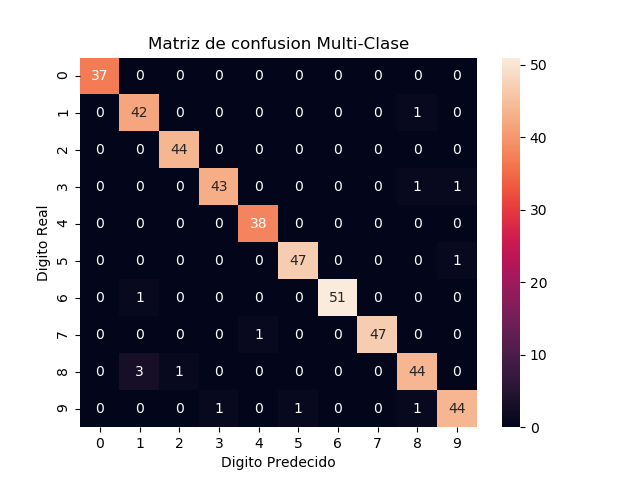

Text(0.5, 23.52222222222222, 'Digito Predecido')

In [2]:
import seaborn as sns

df=pd.DataFrame(confusion)

plt.figure()
plt.title('Matriz de confusion Multi-Clase')
sns.heatmap(df,annot=True)
plt.ylabel('Digito Real')
plt.xlabel('Digito Predecido')

In [3]:
svm2=SVC(kernel='rbf').fit(X_train,y_train)
svm2_predicted=svm2.predict(X_test)
confusion=confusion_matrix(y_test,svm2_predicted)
print(confusion)

[[24  0  0  0 13  0  0  0  0  0]
 [ 0 10  0  0 33  0  0  0  0  0]
 [ 0  0 17  0 27  0  0  0  0  0]
 [ 0  0  0 42  3  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0 32 16  0  0  0  0]
 [ 0  0  0  0 24  0 28  0  0  0]
 [ 0  0  0  0 31  0  0 17  0  0]
 [ 0  0  0  0 47  0  0  0  1  0]
 [ 0  0  0  0 21  0  0  0  0 26]]


<IPython.core.display.Javascript object>


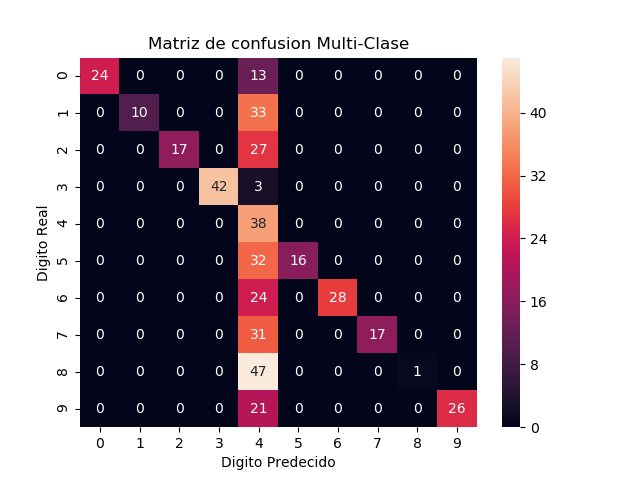

Text(0.5, 23.52222222222222, 'Digito Predecido')

In [4]:
df=pd.DataFrame(confusion)

plt.figure()
plt.title('Matriz de confusion Multi-Clase')
sns.heatmap(df,annot=True)
plt.ylabel('Digito Real')
plt.xlabel('Digito Predecido')

Veamos un reporte completo de la clasificación:

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test,svm_predicted))
print('\n\n\n\n\n')
print(classification_report(y_test,svm2_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

   micro avg       0.97      0.97      0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450







              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3      

## Promedio Micro vs Macro.

$\textbf{Promedio Macro}:$<br>
Cada clase tiene el mismo peso.
1. Métrica computacional dentro de cada clase.
2. Media de las métricas entre clases.

<table style="width:20%">
  <tr>
    <th>Clase</th> 
    <th>Precisión</th>
  </tr>
  <tr>
    <td>orange</td>
    <td>1/5=0.20</td> 
  </tr>
  <tr>
    <td>lemon</td>
    <td>1/2=0.5</td>
  </tr>
  <tr>
    <td>apple</td>
    <td>2/2=1</td>
  </tr>   
</table><br>
(0.20+0.50+1)/3=0.57.

$\textbf{Promedio Micro}:$<br>
Cada instancia tiene el mismo peso, luego la clase más grande tendrá más peso.<br>
4/9=0.44.

In [6]:
from sklearn.metrics import precision_score

print('Micro-averaged precision: {}'.format(precision_score(y_test,svm2_predicted,average='micro')))
print('Macro-averaged precision: {}'.format(precision_score(y_test,svm2_predicted,average='macro')))

print('Micro-averaged precision: {}'.format(precision_score(y_test,svm_predicted,average='micro')))
print('Macro-averaged precision: {}'.format(precision_score(y_test,svm_predicted,average='macro')))

Micro-averaged precision: 0.4866666666666667
Macro-averaged precision: 0.9141263940520445
Micro-averaged precision: 0.9711111111111111
Macro-averaged precision: 0.9714311576233408
